In [9]:
import pandas as pd
from scipy.stats import zscore

# Load Sierra Leone data
df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Make a copy for cleaning
df_sierra_clean = df_sierra.copy()


In [10]:
# Summary statistics for numeric columns
df_sierra_clean.describe()

# Missing values report
df_sierra_clean.isna().sum()

# List columns with >5% nulls
null_percent = df_sierra_clean.isna().mean() * 100
null_percent[null_percent > 5]


Comments    100.0
dtype: float64

In [11]:
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Compute Z-scores
df_sierra_clean[[col + '_zscore' for col in key_cols]] = df_sierra_clean[key_cols].apply(zscore)

# Flag rows where any Z-score > 3
outliers = df_sierra_clean[(df_sierra_clean[[col+'_zscore' for col in key_cols]].abs() > 3).any(axis=1)]

# Drop or impute missing values
for col in key_cols:
    df_sierra_clean[col].fillna(df_sierra_clean[col].median(), inplace=True)


C:\Users\It's Blue\AppData\Local\Temp\ipykernel_10528\2356412751.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sierra_clean[col].fillna(df_sierra_clean[col].median(), inplace=True)


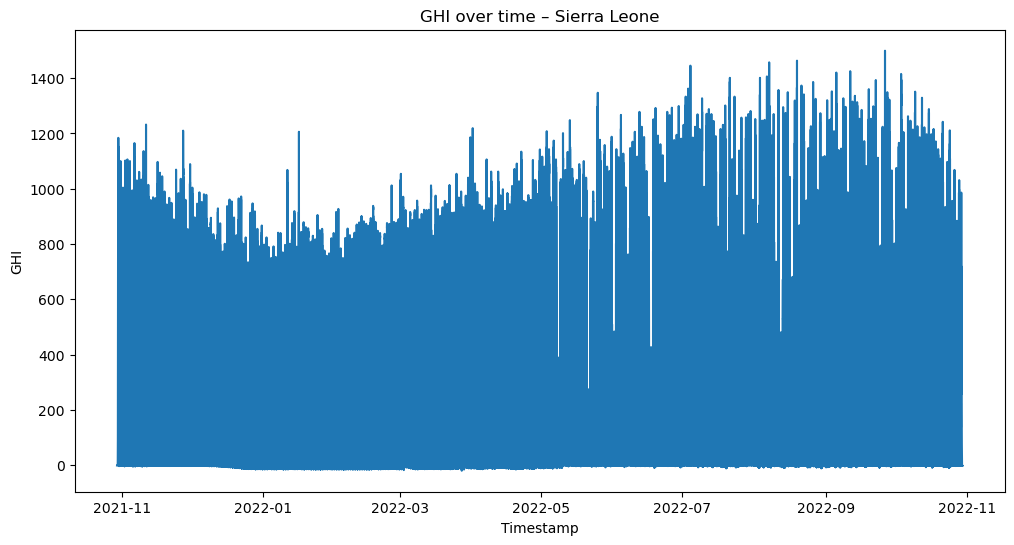

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: GHI over time
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df_sierra_clean['Timestamp']), df_sierra_clean['GHI'])
plt.title("GHI over time – Sierra Leone")
plt.xlabel("Timestamp")
plt.ylabel("GHI")
plt.show()



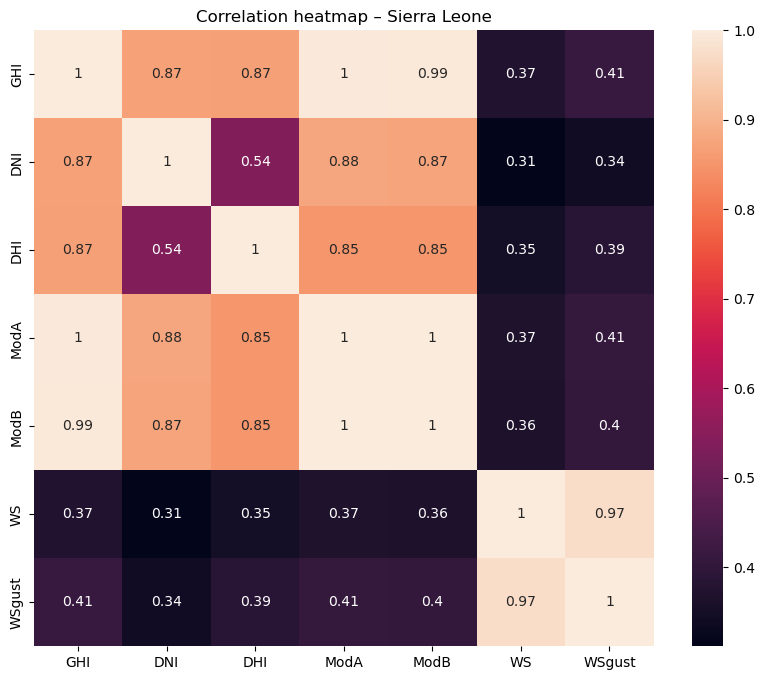

In [14]:

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_sierra_clean[key_cols].corr(), annot=True)
plt.title("Correlation heatmap – Sierra Leone")
plt.show()

In [ ]:
df_sierra_clean.to_csv("data/sierraleone_clean.csv", index=False)
